<center><h1> Desafio 2  X-Wing Team </h1> </center>

<table align='center'>
<tr>
<td><img src='https://blogdesuperheroes.es/wp-content/plugins/BdSGallery/BdSGaleria/71963.jpg' width='750'/> </td>
</tr>
</table>

# Imports

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
random_state=245

# Data

In [2]:
#Cargamos la data y revisamos los elementos primeros elementos de x e y
X_train = pd.read_csv("x_train.csv")
Y_train = pd.read_csv("y_train.csv")
print("# Primeros elementos X")
print(X_train.head(2))
print("\n")
print("# Primeros elementos Y")
print(Y_train.head(2))

# Primeros elementos X
   year  week Borough  Housing  Other jurisdiction  Patrol  Transit  18-24  \
0  2012     1   Bronx      123                  30    1822      163    625   
1  2012    26   Bronx      107                  22    1176      101    412   

   25-44  45-64  ...  Following too closely  Lost consciousness  \
0    879    372  ...                      0                   1   
1    601    252  ...                      0                   0   

   Other vehicular  Passing or lane usage improper  Passing too closely  \
0                0                               0                    0   
1                0                               0                    0   

   Prescription medication  Traffic control disregarded  Turning improperly  \
0                        2                            0                   1   
1                        0                            0                   1   

   Unsafe lane changing  Unspecified  
0                     0           21 

## Exploratorio

Haremos un pequeño análisis exploratorio de datos para revisar cuáles son los atributos numéricos y los no numéricos. Además, buscaremos cuáles son los atributos que menos afectan para mejorar la predicción.

In [3]:
# Sacamos los elementos no numericos en X e Y
numeric_features_X = list(X_train.dtypes[X_train.dtypes != "object"].index)
non_numeric_features_X = list(X_train.dtypes[X_train.dtypes == "object"].index)
non_numeric_features_Y = list(Y_train.dtypes[Y_train.dtypes == "object"].index)
print("Valor numericos en X_Train")
print(numeric_features_X)
print("\n")
print("Valor no numericos en X_Train")
print(non_numeric_features_X)
print("\n")
print("Valor no numericos en Y_Train")
print(non_numeric_features_Y)

Valor numericos en X_Train
['year', 'week', 'Housing', 'Other jurisdiction', 'Patrol', 'Transit', '18-24', '25-44', '45-64', '65+', '<18', 'Unknown', 'Female', 'Male', 'American indian/alaskan native', 'Asian / pacific islander', 'Black', 'Black hispanic', 'Other', 'Unknown.1', 'White', 'White hispanic', 'Domestic', 'Drug_&_Violence', 'Noise', 'Traffic_related', 'Number_of_persons_injured', 'Number_of_persons_killed', 'Backing unsafely', 'Driver inattention/distraction', 'Driver inexperience', 'Failure to yield right-of-way', 'Fatigued/drowsy', 'Following too closely', 'Lost consciousness', 'Other vehicular', 'Passing or lane usage improper', 'Passing too closely', 'Prescription medication', 'Traffic control disregarded', 'Turning improperly', 'Unsafe lane changing', 'Unspecified']


Valor no numericos en X_Train
['Borough']


Valor no numericos en Y_Train
['year_week_borough']


> ## Atributos Numéricos

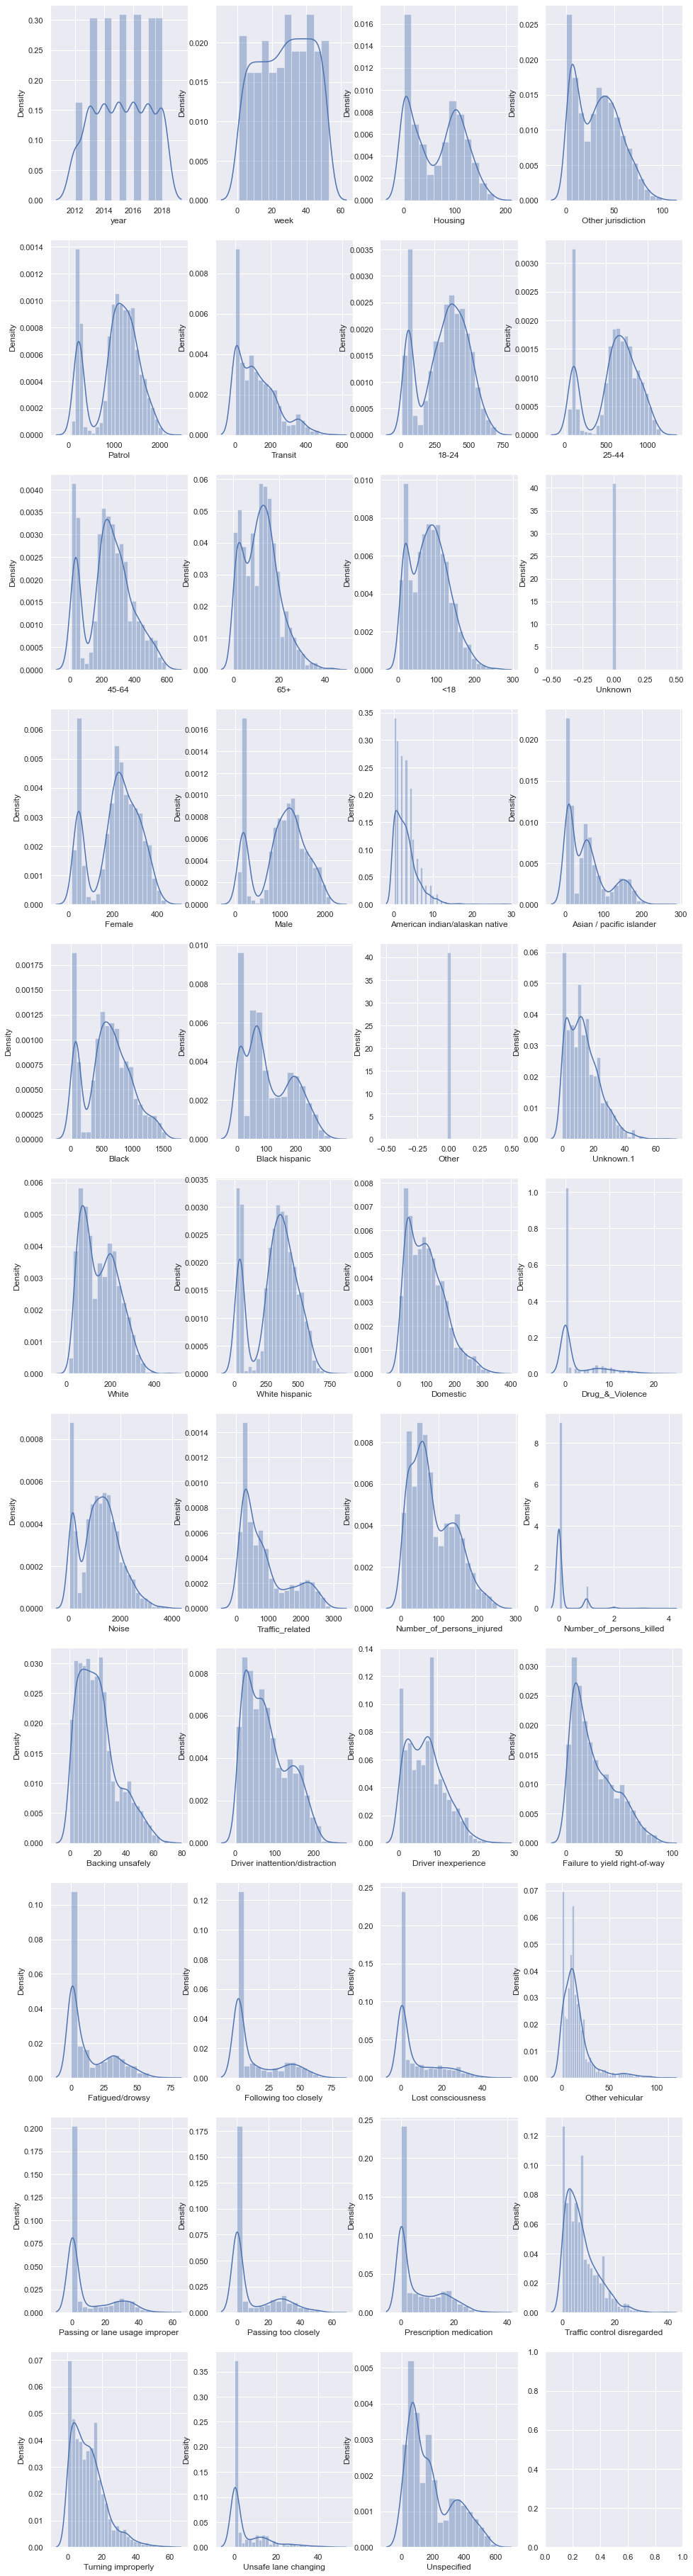

In [4]:
n_show = min(len(numeric_features_X),44)
fig, axes = plt.subplots(figsize=(16,6*int(np.ceil(n_show/4))), nrows=int(np.ceil(n_show/4)), ncols=4)
for i,  column in enumerate(numeric_features_X[:n_show]):
  sns.distplot(X_train[column], hist=True, rug=False, kde=True, ax=axes[i//4,i%4],label=column)  
  i = i+1
plt.show()

> De los gráficos anteriores,  podemos notar que los atributos Unknown y other tienen solo un valor, por lo tanto no deberían aportar en score en el PCA ni en la predicción. Por otro lado, podemos ver que los atributos year y week se distribuyen de manera similar dentro de su rango de valores.  

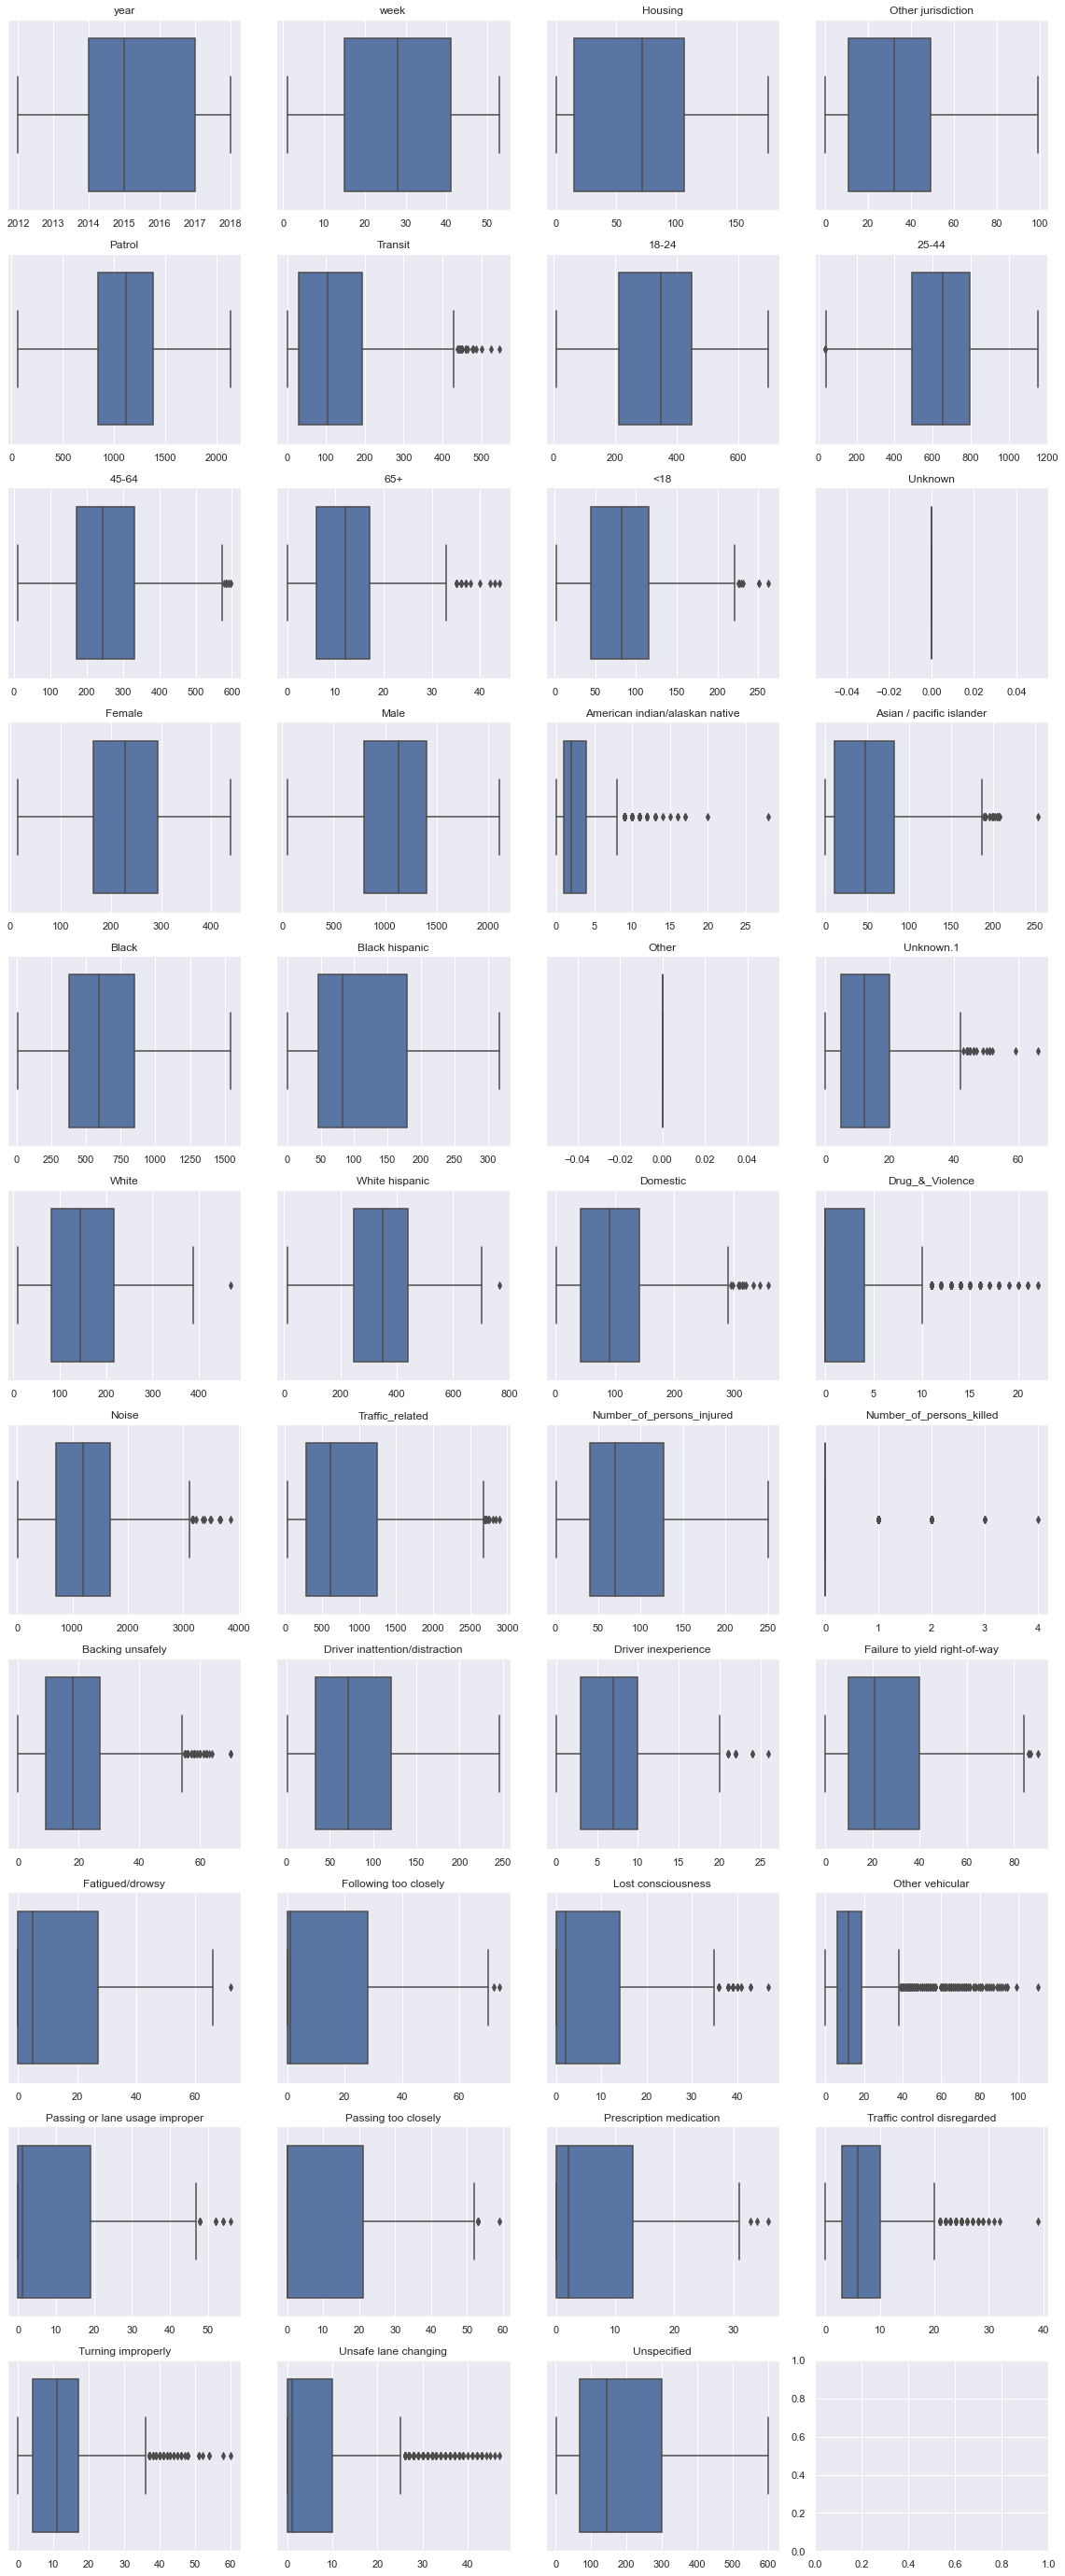

In [5]:
fig, axes = plt.subplots(figsize=(16,3.5*int(np.ceil(n_show/4))), nrows=int(np.ceil(n_show/4)), ncols=4)
for i, column in enumerate(numeric_features_X[:n_show]):
      sns.boxplot(x=X_train[column],ax=axes[i//4,i%4])
      axes[i//4,i%4].set_xlabel("")
      axes[i//4,i%4].set_title(column)
fig.tight_layout()
plt.show()

> ## Atributos No-Numéricos

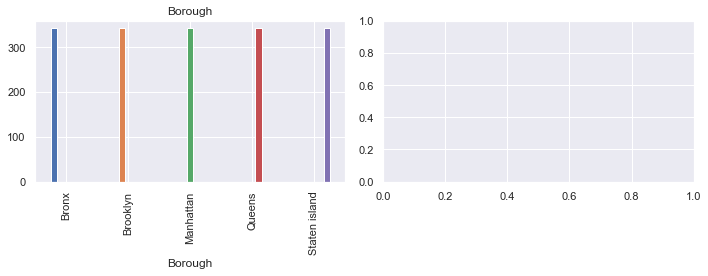

In [6]:
n_show = min(len(non_numeric_features_X),16)
fig, axes = plt.subplots(figsize=(10,4), ncols=2)
for i,  column in enumerate(non_numeric_features_X[:n_show]):    
  X_train.groupby(column)[column].value_counts().unstack().plot.bar(ax=axes[i//2],legend=False)
  axes[i//4].set_title(column)
  i = i+1
fig.tight_layout()
plt.show()

> De los atributos no numéricos, podemos notar que estan distribuidos equitativamente.

> ## Exploratorio en Y

En esta sección, revisaremos los atributos de Y a predecir que son Felony, Misdemeanor y Violation, y como estos se relacionan con los diferentes atributos en pro de dejar los atributos que más aporten a la predicción.

> ### Atributos Numéricos

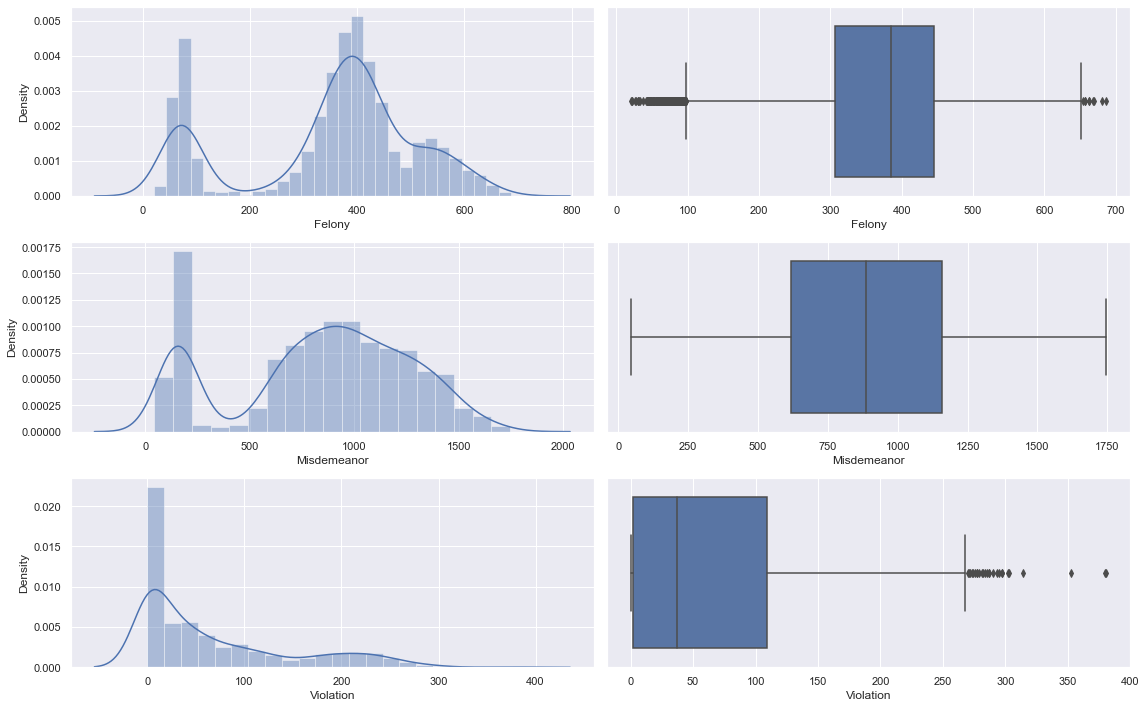

In [7]:
fig, axes = plt.subplots(figsize=(16,10),nrows=3,ncols=2)
sns.distplot(Y_train["Felony"],ax=axes[0,0])
sns.boxplot(x=Y_train["Felony"],ax=axes[0,1])        
sns.distplot(Y_train["Misdemeanor"],ax=axes[1,0])
sns.boxplot(x=Y_train["Misdemeanor"],ax=axes[1,1])        
sns.distplot(Y_train["Violation"],ax=axes[2,0])
sns.boxplot(x=Y_train["Violation"],ax=axes[2,1])             
fig.tight_layout()
plt.show()

> ## Correlación con cada output de Y

En esta sección, revisaremos cómo los diferentes atributos en X aportan a la predicción de cada valor de Y.

> ### Correlación con Felony en Y


Top Correlations


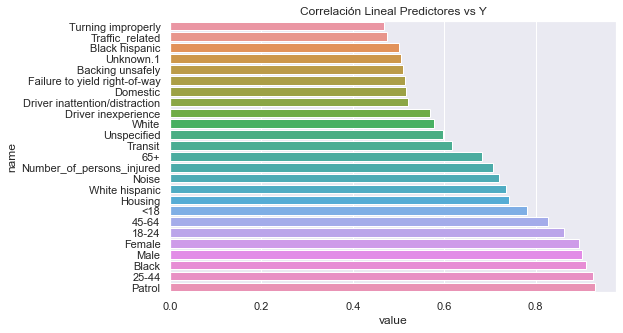


Weakest Correlations


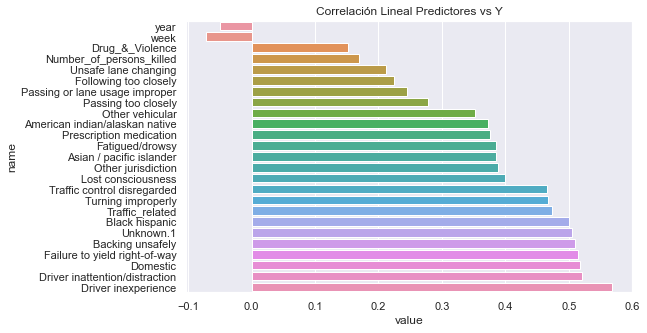


Más Importantes:

['White hispanic', 'Housing', '<18', '45-64', '18-24']
['Female', 'Male', 'Black', '25-44', 'Patrol']

Menos Importantes:

['year', 'week', 'Drug_&_Violence', 'Number_of_persons_killed', 'Unsafe lane changing']
['Following too closely', 'Passing or lane usage improper', 'Passing too closely', 'Other vehicular', 'American indian/alaskan native']


In [8]:
corrmat = X_train[numeric_features_X].corrwith(Y_train['Felony'],axis=0, method='pearson')
abs_corrmat = corrmat.abs()
indices = abs_corrmat.values.argsort()
sorted_corrmat = corrmat.iloc[indices]
named_corrmat = pd.DataFrame(data=sorted_corrmat,columns=['value'])
named_corrmat['name'] = [numeric_features_X[idx] for idx in indices]
named_corrmat = named_corrmat.set_index('name')
n_show = min(len(numeric_features_X),25)
n_nan = int(named_corrmat.isna().sum())
named_corrmat = named_corrmat.dropna()
plot_corrmat = named_corrmat.iloc[-n_show:,:].copy()

print("\nTop Correlations")
fig, ax = plt.subplots(figsize=(8,5*int(np.ceil(n_show/25))))
sns.barplot(x=plot_corrmat.value,y=plot_corrmat.index,orient='h',ax=ax)
#ax.set_yticklabels(predictor_names[:n_show])
ax.set_title("Correlación Lineal Predictores vs Y")
plt.show()

names_top = [str(name) for name in named_corrmat.iloc[-10:,:].copy().index]
plot_corrmat = named_corrmat.iloc[:n_show,:].copy()
print("\nWeakest Correlations")
fig, ax = plt.subplots(figsize=(8,5*int(np.ceil(n_show/25))))
sns.barplot(x=plot_corrmat.value,y=plot_corrmat.index,orient='h',ax=ax)
ax.set_title("Correlación Lineal Predictores vs Y")
plt.show()


names_bottom = [str(name) for name in named_corrmat.iloc[:10,:].copy().index]
print("\nMás Importantes:\n")
print(names_top[:5])
print(names_top[5:])
print("\nMenos Importantes:\n")
print(names_bottom[:5])
print(names_bottom[5:])

> ### Correlación con Misdemeanor en Y


Top Correlations


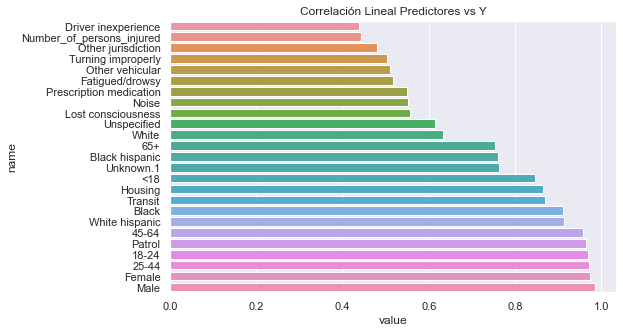


Weakest Correlations


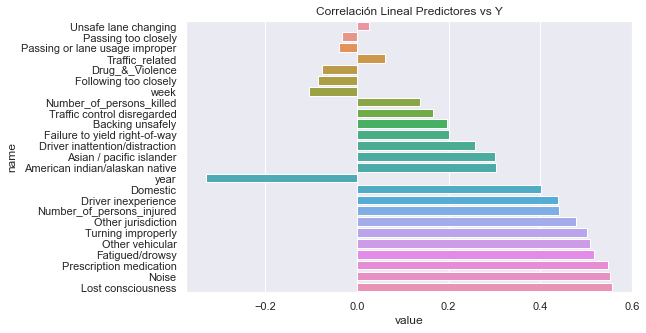


Más Importantes:

['Housing', 'Transit', 'Black', 'White hispanic', '45-64']
['Patrol', '18-24', '25-44', 'Female', 'Male']

Menos Importantes:

['Unsafe lane changing', 'Passing too closely', 'Passing or lane usage improper', 'Traffic_related', 'Drug_&_Violence']
['Following too closely', 'week', 'Number_of_persons_killed', 'Traffic control disregarded', 'Backing unsafely']


In [9]:
corrmat = X_train[numeric_features_X].corrwith(Y_train['Misdemeanor'],axis=0, method='pearson')
abs_corrmat = corrmat.abs()
indices = abs_corrmat.values.argsort()
sorted_corrmat = corrmat.iloc[indices]
named_corrmat = pd.DataFrame(data=sorted_corrmat,columns=['value'])
named_corrmat['name'] = [numeric_features_X[idx] for idx in indices]
named_corrmat = named_corrmat.set_index('name')
n_show = min(len(numeric_features_X),25)
n_nan = int(named_corrmat.isna().sum())
named_corrmat = named_corrmat.dropna()
plot_corrmat = named_corrmat.iloc[-n_show:,:].copy()

print("\nTop Correlations")
fig, ax = plt.subplots(figsize=(8,5*int(np.ceil(n_show/25))))
sns.barplot(x=plot_corrmat.value,y=plot_corrmat.index,orient='h',ax=ax)
#ax.set_yticklabels(predictor_names[:n_show])
ax.set_title("Correlación Lineal Predictores vs Y")
plt.show()

names_top = [str(name) for name in named_corrmat.iloc[-10:,:].copy().index]
plot_corrmat = named_corrmat.iloc[:n_show,:].copy()
print("\nWeakest Correlations")
fig, ax = plt.subplots(figsize=(8,5*int(np.ceil(n_show/25))))
sns.barplot(x=plot_corrmat.value,y=plot_corrmat.index,orient='h',ax=ax)
ax.set_title("Correlación Lineal Predictores vs Y")
plt.show()


names_bottom = [str(name) for name in named_corrmat.iloc[:10,:].copy().index]
print("\nMás Importantes:\n")
print(names_top[:5])
print(names_top[5:])
print("\nMenos Importantes:\n")
print(names_bottom[:5])
print(names_bottom[5:])

> ### Correlación con Violation en Y


Top Correlations


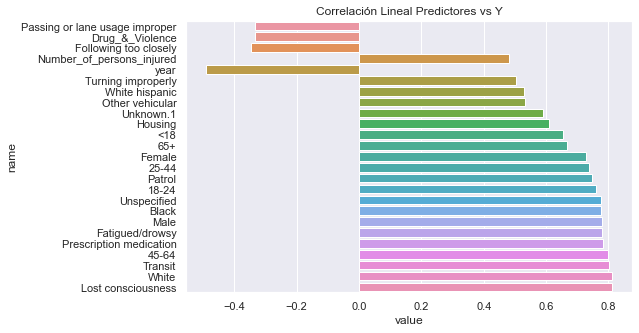


Weakest Correlations


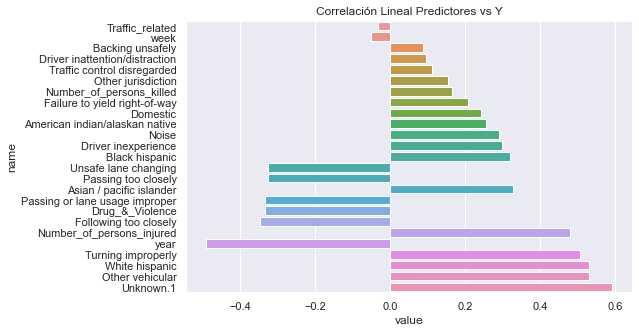


Más Importantes:

['18-24', 'Unspecified', 'Black', 'Male', 'Fatigued/drowsy']
['Prescription medication', '45-64', 'Transit', 'White', 'Lost consciousness']

Menos Importantes:

['Traffic_related', 'week', 'Backing unsafely', 'Driver inattention/distraction', 'Traffic control disregarded']
['Other jurisdiction', 'Number_of_persons_killed', 'Failure to yield right-of-way', 'Domestic', 'American indian/alaskan native']


In [10]:
corrmat = X_train[numeric_features_X].corrwith(Y_train['Violation'],axis=0, method='pearson')
abs_corrmat = corrmat.abs()
indices = abs_corrmat.values.argsort()
sorted_corrmat = corrmat.iloc[indices]
named_corrmat = pd.DataFrame(data=sorted_corrmat,columns=['value'])
named_corrmat['name'] = [numeric_features_X[idx] for idx in indices]
named_corrmat = named_corrmat.set_index('name')
n_show = min(len(numeric_features_X),25)
n_nan = int(named_corrmat.isna().sum())
named_corrmat = named_corrmat.dropna()
plot_corrmat = named_corrmat.iloc[-n_show:,:].copy()

print("\nTop Correlations")
fig, ax = plt.subplots(figsize=(8,5*int(np.ceil(n_show/25))))
sns.barplot(x=plot_corrmat.value,y=plot_corrmat.index,orient='h',ax=ax)
#ax.set_yticklabels(predictor_names[:n_show])
ax.set_title("Correlación Lineal Predictores vs Y")
plt.show()

names_top = [str(name) for name in named_corrmat.iloc[-10:,:].copy().index]
plot_corrmat = named_corrmat.iloc[:n_show,:].copy()
print("\nWeakest Correlations")
fig, ax = plt.subplots(figsize=(8,5*int(np.ceil(n_show/25))))
sns.barplot(x=plot_corrmat.value,y=plot_corrmat.index,orient='h',ax=ax)
ax.set_title("Correlación Lineal Predictores vs Y")
plt.show()


names_bottom = [str(name) for name in named_corrmat.iloc[:10,:].copy().index]
print("\nMás Importantes:\n")
print(names_top[:5])
print(names_top[5:])
print("\nMenos Importantes:\n")
print(names_bottom[:5])
print(names_bottom[5:])

> ## PCA

In [11]:
encoder=preprocessing.LabelEncoder()
X_train.Borough=encoder.fit_transform(X_train.Borough)
pca = PCA()
pca.fit(X_train)
data = {'score' : pca.components_[0], 'column' : X_train.columns}
df_pca = pd.DataFrame(data = data).sort_values(by = 'score', key = lambda col: np.abs(col), ascending = False)
df_pca

,score,column
25,0.587242,Noise
14,0.417055,Male
5,0.393516,Patrol
26,0.354855,Traffic_related
17,0.285826,Black
8,0.236502,25-44
7,0.123505,18-24
22,0.107798,White hispanic
9,0.103950,45-64
13,0.081974,Female


 > De este análisis y de los múltiples intentos por mejorar el score en kaggle, consideramos que la mejor decisión hasta ahora es quitar los atributos 'Other', 'Unknown', 'Number_of_persons_killed', 'year', 'week' y 'Borough' en pro de mejorar la predicción.

In [12]:
# Funcion para eliminar atributos que no se utilizaran
def eliminar_atributos_X(X):
    eliminar=['Other','Unknown','Number_of_persons_killed', 'year','week','Borough']
    for i in eliminar:
        if i in X.columns:
            X.drop([i], axis='columns', inplace=True)
    return X
X_train=eliminar_atributos_X(X_train)
if 'year_week_borough' in Y_train.columns:
    Y_train.drop(['year_week_borough'],axis='columns', inplace=True)

# Ridge

In [13]:
# Mantenemos los datos en original
X_train_original=X_train
Y_train_original=Y_train

In [14]:
#Hacemos validación tipica para validacion clasica para encontrar el mejor valor de alpha para la predicción
X_train_full, X_test, y_train_full, y_test = train_test_split(X_train_original, Y_train_original, test_size=0.5, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.5, random_state=random_state)

print("X,y Shapes:", X_train_original.shape, Y_train_original.shape)
print("X,y Train Full Shapes:", X_train_full.shape, y_train_full.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)
print("X,y Test Shapes:", X_test.shape, y_test.shape)
np.random.RandomState(random_state)

best_acc_test = 0
best_alpha_test = 0 

alpha_range=np.logspace(-4, 10, num=8, endpoint=True, base=8)

for alpha_val in alpha_range:

    fold_accuracy = []    
    model =MultiOutputRegressor(Ridge(random_state=245,alpha=alpha_val))

    model.fit(X_train_full, y_train_full)
    train_acc = model.score(X_train_full,y_train_full)
    test_acc = model.score(X_test,y_test)
    if test_acc > best_acc_test:
      best_acc_test = test_acc
      best_alpha_test = alpha_val    

print(best_alpha_test)

X,y Shapes: (1710, 38) (1710, 3)
X,y Train Full Shapes: (855, 38) (855, 3)
X,y Train Shapes: (427, 38) (427, 3)
X,y Val Shapes: (428, 38) (428, 3)
X,y Test Shapes: (855, 38) (855, 3)
4096.0


In [15]:
#Cargamos la data de test e ignoramos los primeros 10 ya que son antes de los de y
x_test = pd.read_csv("x_test.csv")
x_test=x_test[10:][:] #ignoramos los primeros 10
x_test=eliminar_atributos_X(x_test)
if "year_week_borough" in x_test.columns:
    x_test.drop(['year_week_borough'], axis='columns', inplace=True)
print(x_test.head(2))
clf = MultiOutputRegressor(Ridge(random_state=245,alpha=best_alpha_test)).fit(X_train_original, Y_train_original)
result_submit=clf.predict(x_test)

    Housing  Other jurisdiction  Patrol  Transit  18-24  25-44  45-64  65+  \
10       53                  31     908       29    239    553    183   10   
11       42                  32     839       64    191    521    203   10   

    <18  Female  ...  Following too closely  Lost consciousness  \
10   36     210  ...                     15                   0   
11   52     186  ...                     18                   0   

    Other vehicular  Passing or lane usage improper  Passing too closely  \
10               18                              15                   20   
11               27                              14                   16   

    Prescription medication  Traffic control disregarded  Turning improperly  \
10                        0                            4                   6   
11                        0                           11                  11   

    Unsafe lane changing  Unspecified  
10                     7           77  
11           

In [16]:
#Cargamos el pattern y_Test para poder unificar los dataframe
y_test = pd.read_csv("y_test_pattern.csv")
y_test

,Felony,Misdemeanor,Violation,year_week_borough
0,NaN,NaN,NaN,2019_11_Bronx
1,NaN,NaN,NaN,2019_12_Bronx
2,NaN,NaN,NaN,2019_13_Bronx
3,NaN,NaN,NaN,2019_14_Bronx
4,NaN,NaN,NaN,2019_15_Bronx
...,...,...,...,...
245,NaN,NaN,NaN,2019_48_Staten island
246,NaN,NaN,NaN,2019_49_Staten island
247,NaN,NaN,NaN,2019_50_Staten island
248,NaN,NaN,NaN,2019_51_Staten island


In [17]:
result_submit=pd.DataFrame(result_submit, columns = ['Felony', 'Misdemeanor', 'Violation'])
result_submit=result_submit.round(0).astype(int)
print(result_submit)
data=pd.concat([result_submit, y_test.year_week_borough],axis=1)
print(data)
data.to_csv('out_ultimate.csv', mode='w', index=False, header=True,sep=',',decimal='.')

     Felony  Misdemeanor  Violation
0       336          691         -6
1       324          648          6
2       328          635         -4
3       364          719          0
4       336          649         -5
..      ...          ...        ...
245      56           74        -15
246      60          106        -10
247      53          119         -4
248      54           87        -17
249      45           62        -12

[250 rows x 3 columns]
     Felony  Misdemeanor  Violation      year_week_borough
0       336          691         -6          2019_11_Bronx
1       324          648          6          2019_12_Bronx
2       328          635         -4          2019_13_Bronx
3       364          719          0          2019_14_Bronx
4       336          649         -5          2019_15_Bronx
..      ...          ...        ...                    ...
245      56           74        -15  2019_48_Staten island
246      60          106        -10  2019_49_Staten island
247      53  

# SVM con regresión

In [18]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_train_original, Y_train_original, test_size=0.5, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.5, random_state=random_state)

print("X,y Shapes:", X_train_original.shape, Y_train_original.shape)
print("X,y Train Full Shapes:", X_train_full.shape, y_train_full.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)
print("X,y Test Shapes:", X_test.shape, y_test.shape)

np.random.RandomState(random_state)

best_acc_test = 0
best_C_test = 0 

c_range=np.logspace(-4, 6, num=8, endpoint=True, base=10.0)
for c_val in c_range:         
    model = MultiOutputRegressor(SVR(kernel='rbf',C=c_val))    
    model.fit(X_train_full, y_train_full)
    train_acc = model.score(X_train_full,y_train_full)
    test_acc = model.score(X_test,y_test)
    if test_acc > best_acc_test:
      best_acc_test = test_acc
      best_C_test = c_val
        
print(best_C_test)

X,y Shapes: (1710, 38) (1710, 3)
X,y Train Full Shapes: (855, 38) (855, 3)
X,y Train Shapes: (427, 38) (427, 3)
X,y Val Shapes: (428, 38) (428, 3)
X,y Test Shapes: (855, 38) (855, 3)
1389.4954943731389


In [19]:
#Cargamos la data de test e ignoramos los primeros 10 ya que son antes de los de y
x_test = pd.read_csv("x_test.csv")
x_test=x_test[10:][:] #ignoramos los primeros 10
x_test=eliminar_atributos_X(x_test)
y_test = pd.read_csv("y_test_pattern.csv")
if "year_week_borough" in x_test.columns:
    x_test.drop(['year_week_borough'], axis='columns', inplace=True)
model= MultiOutputRegressor(SVR(kernel='rbf',C=best_C_test)) 
model.fit(X_train_original, Y_train_original)
result_submit=model.predict(x_test)

In [20]:
result_submit=pd.DataFrame(result_submit, columns = ['Felony', 'Misdemeanor', 'Violation'])
result_submit=result_submit.astype(int)
data=pd.concat([result_submit, y_test.year_week_borough],axis=1)
print(data)
data.to_csv('out_ultimate2.csv', mode='w', index=False, header=True,sep=',',decimal='.')


     Felony  Misdemeanor  Violation      year_week_borough
0       326          693          5          2019_11_Bronx
1       322          647          5          2019_12_Bronx
2       319          639          2          2019_13_Bronx
3       346          725          9          2019_14_Bronx
4       316          652          6          2019_15_Bronx
..      ...          ...        ...                    ...
245      42           78          0  2019_48_Staten island
246      53          104          0  2019_49_Staten island
247      53          113          0  2019_50_Staten island
248      41           86          0  2019_51_Staten island
249      33           68          0  2019_52_Staten island

[250 rows x 4 columns]


Como comentarios finales, intentamos probando dos multioutputregressor, testeando para ridge y para svr, haciendo validación para obtener el mejor valor de alpha y c respectivamente. De todos los submit que hicimos el mejor resultado lo obtuvimos del out de ridge.

Nos percatamos que al ignorar algunos atributos que no aportaban en score en la predicción (a partir de las correlaciones y el PCA), nuestro score mejoró. Sin embargo, a partir de lo dicho en la clase del viernes, esperábamos tener un mejor resultado con SVR pero no lo obtuvimos. Creemos que tal vez el no hacer cross validation no nos permitió llegar a un C mejor o tal vez el no variar la semilla nos podría haber empeorado el score. 

Como último, el ignorar los 5 peores atributos para la predicción mejoró nuestra predicción pero tal vez el seguir aumentando la cantidad de atributos ignorados hubiera mejorado aún más nuestros resultados.